In [1]:
import torch
import torch.nn as nn
import numpy as np
import random                                                                  
import matplotlib.pyplot as plt
torch.backends.cudnn.deterministic=True
from torch.nn import functional as F
import torch.optim as optim
from torch.autograd import Variable 
from torch.utils.data import Dataset, DataLoader
import math
from torch.autograd import grad
from Libraries import robotarm as ra
from Libraries import ICNN_net as net
from Libraries import ICNN_plot as pl
from Libraries import ICNN_optim as opt
dtype = torch.float
device_c = torch.device("cpu")
device = torch.device("cuda:1")

In [4]:
#robot initialize
l1 = 3 
l2 = 2
m1 = 3
m2 = 4
robot = ra.robotarm(l1,l2,m1,m2,device)
xinit = torch.tensor([[-3],[0]],dtype=dtype)
xfinal = torch.tensor([[3],[2.5]],dtype=dtype)
T = 5
delta = 0.6
num_timesteps = 100
rmin,rmax,qmin,qmax,dt,qinit,qfinal,Xstable,xtraj,x_dot,qtraj,q_dot = robot.Initialize(xinit,xfinal,T,delta,num_timesteps)

#ICNN initialize
V_hidden_sizes = [200, 200,200,200]
fhat_hidden_sizes = [1000,1000,1000,1000,1000]
tol = 0.01
alpha = 0.01
#model = net.ICNN_net( V_hidden_sizes, fhat_hidden_sizes,tol,alpha)


In [5]:
###################################################################
#getting grid data (for the regularizer)
nq1 = 100 # grid number
nq2 = 100 
nq1_b = 10 # grid number
nq2_b = 10
penalty = 10000
penalty_boundary = 50000
optim_ = opt.ICNN_optim(V_hidden_sizes, fhat_hidden_sizes,tol,alpha,Xstable,device) #qmin, qmax는 위에서 구함
q_in_reg,q1,q2 = optim_.get_grid(nq1,nq2,qmin,qmax)
q_in_boundary,q_dot_boundary = optim_.get_boundary(nq1_b,nq2_b,qmin,qmax)

In [6]:
optim_.optim_no_reg(qtraj,q_dot,dt,q_in_boundary,q_dot_boundary, learning_rate = 1e-3 ,epoch=300)

 epoch = 300, loss = 0.0053767213, loss_b = 0.00032987425, loss_t = 0.0053766123                    . 

In [7]:

optim_.optim_Kinetic_reg(robot, q_in_reg,qtraj ,q_dot,dt,q_in_boundary,q_dot_boundary,penalty,penalty_boundary, Xstable, learning_rate = 1e-2,epoch=100, batch_size = 100)

 epoch = 52 i = 45, loss = 1572.3315, total_loss = 5185.571, loss_b = 0.3110789, loss_t = 0.18321948, loss_reg = 304.5808, loss_reg_total =  3387.9617           .      .   

KeyboardInterrupt: 

In [1]:
nq1_p = 100
nq2_p = 100
nx1 = 100
nx2 = 100
xmin = [-robot.l1-robot.l2, -robot.l2]
xmax = [robot.l1+robot.l2,robot.l1+robot.l2]
plt_ = pl.ICNN_plot(optim_.model,qmin,qmax,nq1_p,nq2_p,xmin,xmax,nx1,nx2,Xstable,qtraj,xtraj,l1,l2,device)

NameError: name 'robot' is not defined

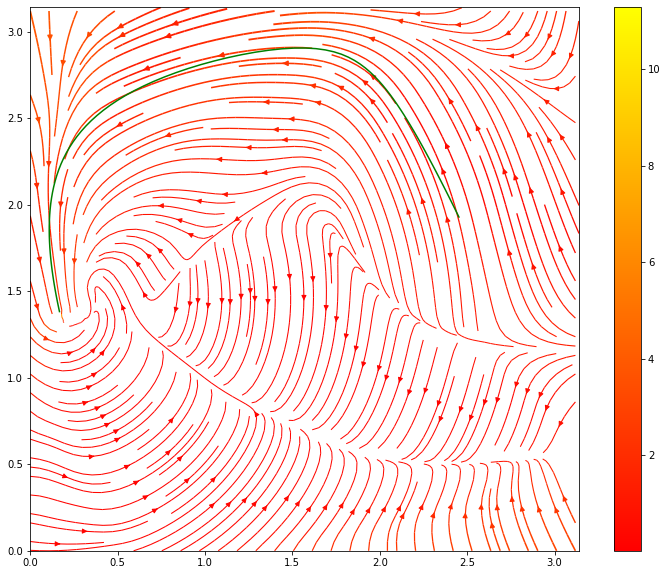

In [16]:
plt_.plot_f('fplot.png', 2, 0.5, 1, quiver = False, streamplot = True)

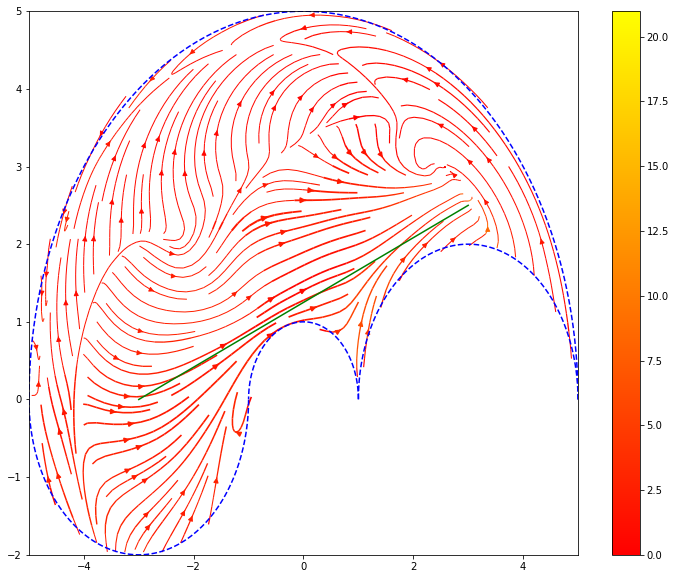

<Figure size 835.92x504 with 0 Axes>

In [17]:
plt_.plot_f_taskspace('task_plot.png', robot, 2, 0.5, 1, quiver = False, streamplot = True)